INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -1047696
INFO:lda:<10> log likelihood: -721299
INFO:lda:<20> log likelihood: -699771
INFO:lda:<30> log likelihood: -691038
INFO:lda:<40> log likelihood: -685854
INFO:lda:<50> log likelihood: -682792
INFO:lda:<60> log likelihood: -678960
INFO:lda:<70> log likelihood: -677753
INFO:lda:<80> log likelihood: -675428
INFO:lda:<90> log likelihood: -674182
INFO:lda:<100> log likelihood: -673125
INFO:lda:<110> log likelihood: -671661
INFO:lda:<120> log likelihood: -670148
INFO:lda:<130> log likelihood: -669348
INFO:lda:<140> log likelihood: -669102
INFO:lda:<150> log likelihood: -668994
INFO:lda:<160> log likelihood: -668634
INFO:lda:<170> log likelihood: -667909
INFO:lda:<180> log likelihood: -667020
INFO:lda:<190> log likelihood: -666749
INFO:lda:<200> log likelihood: -666199
INFO:lda:<210> log likelihood: -666255
INFO:lda:<220> log likelihood: -

type(X): <class 'numpy.ndarray'>
shape: (395, 4258)

[[ 1  0  1  0  0  0  1  0  0  1]
 [ 7  0  2  0  0  0  0  1  0  0]
 [ 0  0  0  1 10  0  4  1  1  0]
 [ 6  0  1  0  0  0  1  1  1  0]
 [ 0  0  0  2 14  1  1  0  2  1]
 [ 0  0  2  2 24  0  2  0  2  1]
 [ 0  0  0  2  7  1  1  0  1  0]
 [ 0  0  2  2 20  0  2  0  3  1]
 [ 0  1  0  2 17  2  2  0  0  0]
 [ 2  0  2  0  0  2  0  1  0  3]]
type(vocab): <class 'tuple'>
len(vocab): 4258

('church', 'pope', 'years', 'people', 'mother', 'last', 'told', 'first', 'world', 'year')
type(titles): <class 'tuple'>
len(titles): 395

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20', '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21', "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23", '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25', '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25', "5 INDIA: Mother Teresa's

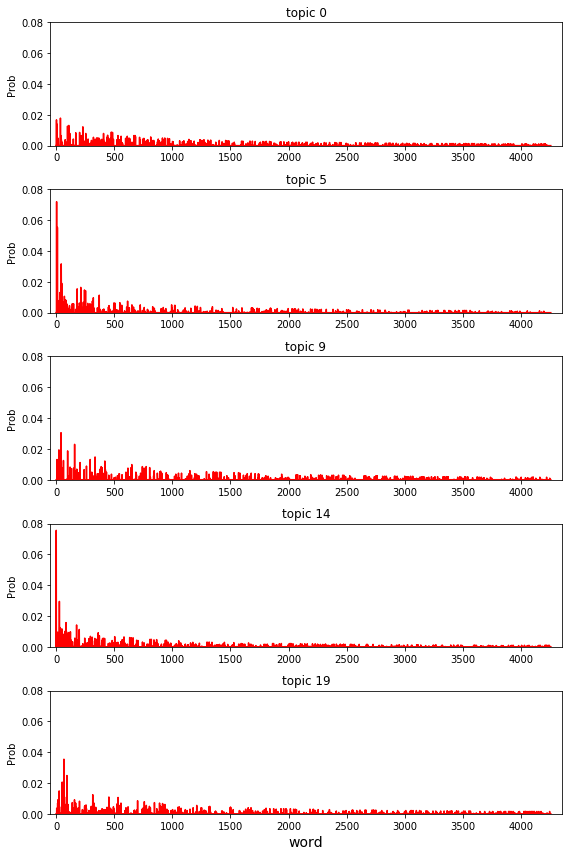

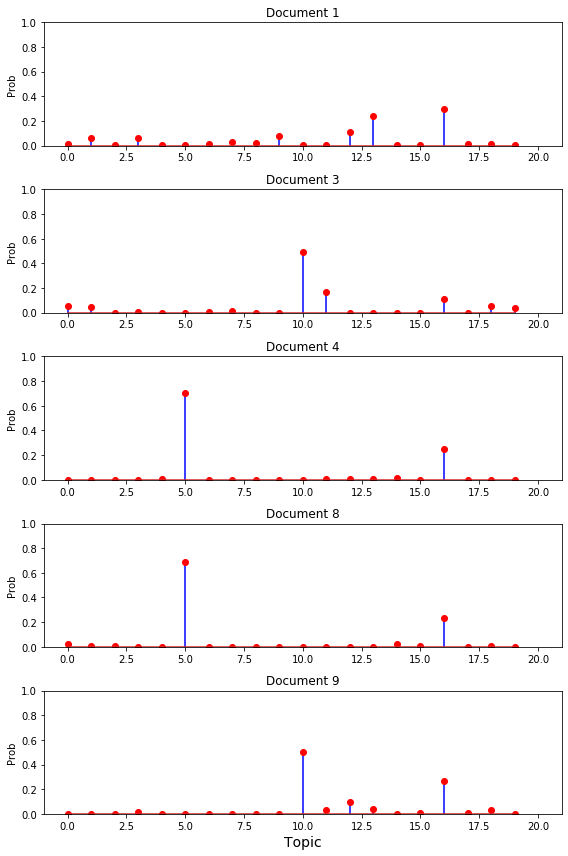

In [13]:
# -*- coding:utf8 -*-

import numpy as np
import matplotlib.pyplot as plt
import lda
import lda.datasets

if __name__ == "__main__":
    # # 1. 加载数据
    # document-term matrix 
    X = lda.datasets.load_reuters()  # 加载语料库,每一行为一篇文章
    print("type(X): {}".format(type(X))) # 数据格式是ndarray
    print("shape: {}\n".format(X.shape)) # 数据的大小
    print(X[:10, :10])  # 打印前10行前10列来看看

    # the vocab  
    vocab = lda.datasets.load_reuters_vocab()  # 加载字典
    print("type(vocab): {}".format(type(vocab)))  # 数据格式是tuple
    print("len(vocab): {}\n".format(len(vocab)))  # 数据大小，即总共有多少个无重复的词
    print(vocab[:10])

    # titles for each story  加载标题
    titles = lda.datasets.load_reuters_titles()  # 加载标题
    print("type(titles): {}".format(type(titles)))  # 数据类也是tuple
    print("len(titles): {}\n".format(len(titles)))  # 数据集大小（应与语料库中的行数相等）
    print(titles[:10])

    # # 2.训练模型
    print ('LDA start ----')
    topic_num = 20
    model = lda.LDA(n_topics=topic_num,alpha=0.2, n_iter=1000, random_state=5)
    model.fit(X)

    # # 3.输出结果
    # topic-word
    topic_word = model.topic_word_  # 获取每个主题中词的概率
    print("type(topic_word): {}".format(type(topic_word)))
    print("shape: {}".format(topic_word.shape))
    print(vocab[:5]) # 字典的前5个词
    print(topic_word[:, :5])  # 对应与字典的前5个词的概率

    # Print Topic distribution
    n = 7
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n + 1):-1]
        print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))

    # Document - topic 取出每个文档中对应概率最高的那个主题
    doc_topic = model.doc_topic_
    print("type(doc_topic): {}".format(type(doc_topic)))
    print("shape: {}".format(doc_topic.shape))
    for i in range(10):
        topic_most_pr = doc_topic[i].argmax()
        print("doc: {} topic: {} value: {}".format(i, topic_most_pr, doc_topic[i][topic_most_pr]))
        
        
        # # 4. 可视化结果
    # Topic - word  主题中词的分布图
    plt.figure(figsize=(8, 12))
    for i, k in enumerate([0, 5, 9, 14, 19]):
        ax = plt.subplot(5, 1, i+1)
        ax.plot(topic_word[k, :], 'r-')
        ax.set_xlim(-50, 4350)   # [0,4258]
        ax.set_ylim(0, 0.08)
        ax.set_ylabel("Prob")
        ax.set_title("topic {}".format(k))
    plt.xlabel("word", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    
     # Document - Topic  文档中主题的分布图
    plt.figure(figsize=(8, 12))
    for i, k in enumerate([1, 3, 4, 8, 9]):
        ax = plt.subplot(5, 1, i+1)
        ax.stem(doc_topic[k, :], linefmt='b-', markerfmt='ro')
        ax.set_xlim(-1, topic_num+1)
        ax.set_ylim(0, 1)
        ax.set_ylabel("Prob")
        ax.set_title("Document {}".format(k))
    plt.xlabel("Topic", fontsize=14)
    plt.tight_layout()
    plt.show()


